In [4]:
import pandas as pd
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [6]:
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

dataset = pd.read_csv('letter-recog.csv')

In [7]:
print(dataset.shape)

(19999, 17)


In [8]:
print(dataset.describe())


                  2             8             3             5             1  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       4.023651      7.035452      5.121956      5.372469      3.505975   
std        1.913206      3.304631      2.014568      2.261445      2.190441   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      5.000000      4.000000      4.000000      2.000000   
50%        4.000000      7.000000      5.000000      6.000000      3.000000   
75%        5.000000      9.000000      6.000000      7.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

                8.1            13             0             6           6.1  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       6.897545      7.500175      4.628831      5.178609      8.282164   
std        2.026071      2.325087      2.699837    

In [11]:
array = dataset.values
X = array[:, 1:17]
Y = array[:, 0]

In [12]:
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)


X matrix dimensionality: (19999, 16)
Y vector dimensionality: (19999,)


In [13]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                                random_state=10)

In [14]:
print("X_train: ", X_train.shape)
print("X_validation: ", X_validation.shape)
print("Y_train: ", Y_train.shape)
print("Y_validation: ", Y_validation.shape)

X_train:  (15999, 16)
X_validation:  (4000, 16)
Y_train:  (15999,)
Y_validation:  (4000,)


In [15]:
gaussianNB = GaussianNB()

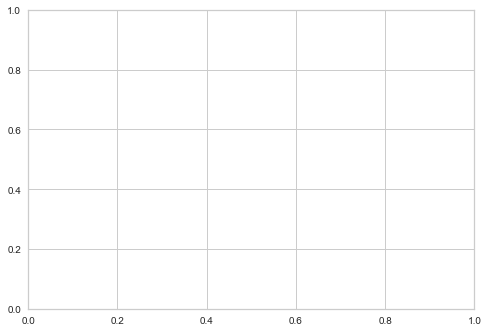

In [16]:
cm = ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [17]:
cm.fit(X_train, Y_train)


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x02E272D0>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x05D82ED0>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

In [18]:
cm.score(X_validation, Y_validation)


0.65075

In [19]:
predictions = cm.predict(X_validation)

In [20]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.65075


In [21]:
print(confusion_matrix(Y_validation, predictions))


[[155   0   0   0   0   0   0   0   0   0   1   0   4   2   0   0   2   2
    1   0   0   0   1   1   1   0]
 [  0 100   0   7   0   0   3   1  11   0   1   0   2   0   0   0   2   9
    2   0   0   0   4   2   0   0]
 [  0   0 122   0   3   0  10   0   0   0  14   0   0   0   4   0   2   1
    4   0   1   0   0   0   0   0]
 [  3  12   0 134   0   0   0   0   3   2   2   0   4   0   5   0   0   7
    1   0   0   0   0   0   1   0]
 [  0   0   2   0  49   0  26   0  10   0   5   0   0   0   0   0  10   1
    6   5   2   0   0  29   0   3]
 [  0   6   0   7   0 102   2   0   1   0   0   0   0   2   0   3   4   0
    2   4   0   0   2   2   0   0]
 [  1   2  26   1   0   1  75   0   2   0   5   0   2   0   3   0  15   2
    2   0   0   0   3   1   0   0]
 [  1  10   0   8   0   2   0  40   5   0   5   0   7   2  21   0   2   9
    0   0   1   0   4  19   2   0]
 [  0   4   0   6   3   1   0   0 114   7   1   1   0   0   0   0   1   0
    9   0   0   0   0   0   0   1]
 [  0   2   0   8  

In [22]:
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.85635   0.91176   0.88319       170
           B    0.47619   0.69444   0.56497       144
           C    0.81333   0.75776   0.78457       161
           D    0.63810   0.77011   0.69792       174
           E    0.56977   0.33108   0.41880       148
           F    0.68456   0.74453   0.71329       137
           G    0.51020   0.53191   0.52083       141
           H    0.50000   0.28986   0.36697       138
           I    0.56436   0.77027   0.65143       148
           J    0.83594   0.76429   0.79851       140
           K    0.46043   0.47059   0.46545       136
           L    0.96063   0.73054   0.82993       167
           M    0.66079   0.89286   0.75949       168
           N    0.90164   0.73826   0.81181       149
           O    0.50673   0.73377   0.59947       154
           P    0.88722   0.74214   0.80822       159
           Q    0.49664   0.52113   0.50859       142
           R    0.64286   0

In [23]:
cm.poof()
